<h1 style="color:red;">IMPORTING ALL THE NECESSARY PACKAGES</h1>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

<h1>LOADING THE DATASET</h1>

In [ ]:
dataset = pd.read_csv("/content/heart.csv")



<h1>UNDERSTANDING THE DATASET</h1>

In [15]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


<h1>UNIVARIATE ANALYSIS</h1>

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<h1>ANALYZING FASTING BLOOD SUGAR LEVEL</h1>

<Axes: xlabel='fbs', ylabel='target'>

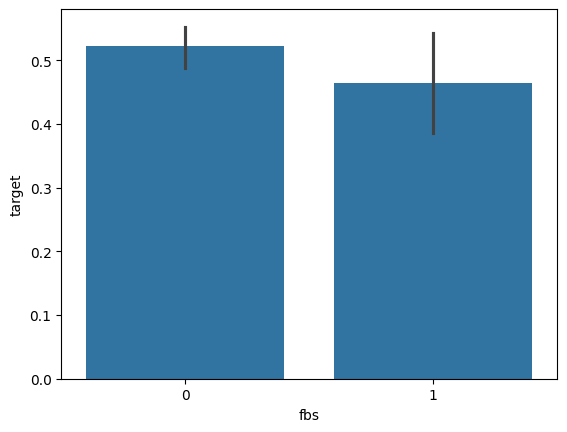

In [39]:
sns.barplot(x=dataset["fbs"],y=y)

<h1>ANALYZING CHEST PAIN LEVEL</h1>

In [44]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='cp', ylabel='target'>

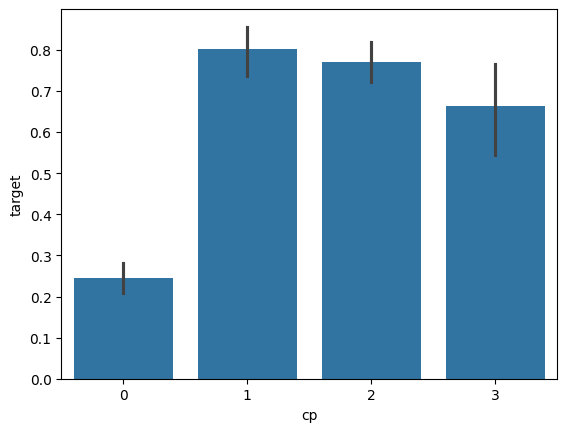

In [37]:
sns.barplot(x=dataset["cp"],y=y)

<h4>We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems</h4>

<h1>ANALYZING THALASSEMIA(less hemoglobin)FACTOR IN THE DATASET

In [43]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

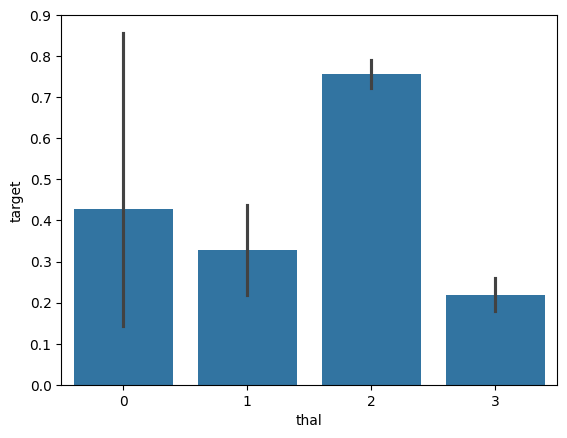

In [36]:
sns.barplot(x=dataset["thal"],y=y)

<h4>Te wide range of number from 0-3 indicates thal level of people.We can infer that more people have normal hemoglobin</h4>

<h1>ANALYSING TARGET VARIABLE</h1>

In [ ]:
dataset["target"].unique()

array([0, 1])

<h3>Value=0 Indicates that the patient does not have heart disease ; Value=1 indicates that patient has heart disease</h3>

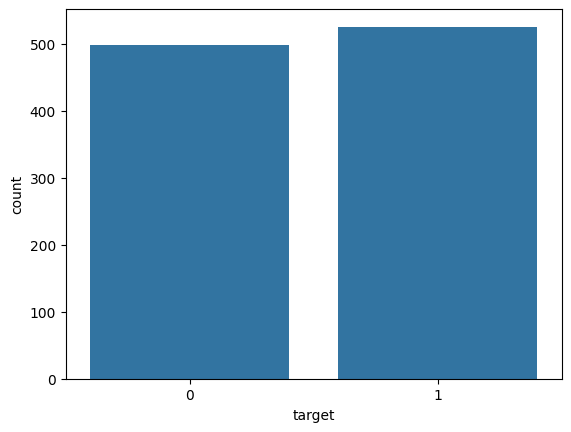

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x="target")
plt.show()

<h4>The above visualizations indicate that the dataset contains more details of people with heart disease than the people without heart disease</h4>

<h1>ANALYZING AGE DISTRIBUTION</h1>

<Axes: >

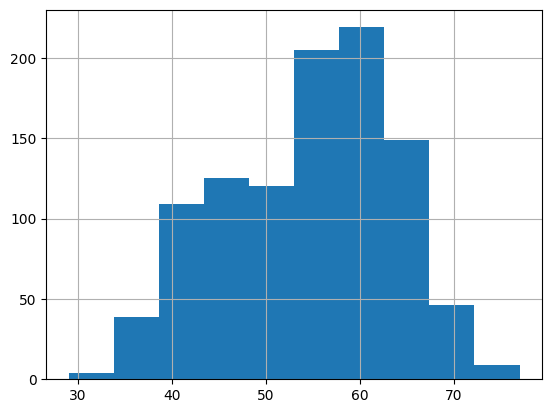

In [49]:
dataset.age.hist()

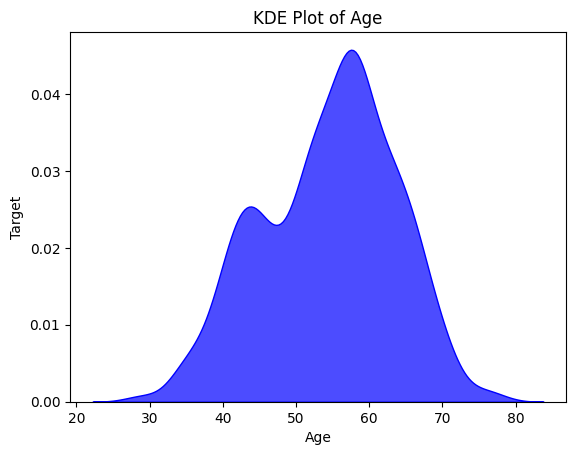

In [52]:
sns.kdeplot(dataset.age, fill=True, color='blue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Target')
plt.title('KDE Plot of Age')

plt.show()

<h1>BIVARIATE ANALYSIS</h1>

In [53]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [55]:
dataset.corr().ca


age         0.271551
sex         0.111729
cp         -0.176206
trestbps    0.104554
chol        0.074259
fbs         0.137156
restecg    -0.078072
thalach    -0.207888
exang       0.107849
oldpeak     0.221816
slope      -0.073440
ca          1.000000
thal        0.149014
target     -0.382085
Name: ca, dtype: float64

In [59]:
r, p = stats.pearsonr(dataset.age, dataset.fbs)
r, p

(0.1212434787053551, 9.970346625783921e-05)

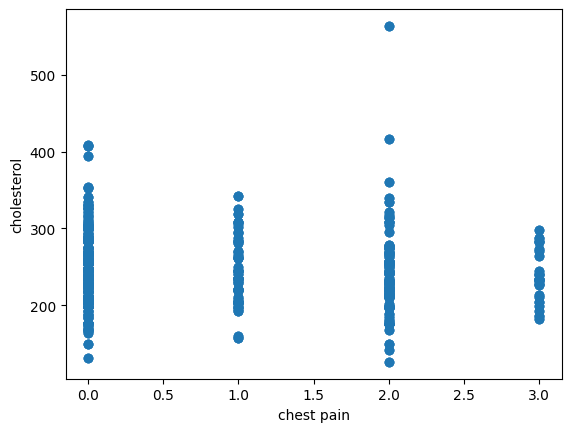

In [61]:
plt.scatter(dataset.cp, dataset.chol)

plt.xlabel('chest pain')
plt.ylabel('cholesterol')
plt.show()

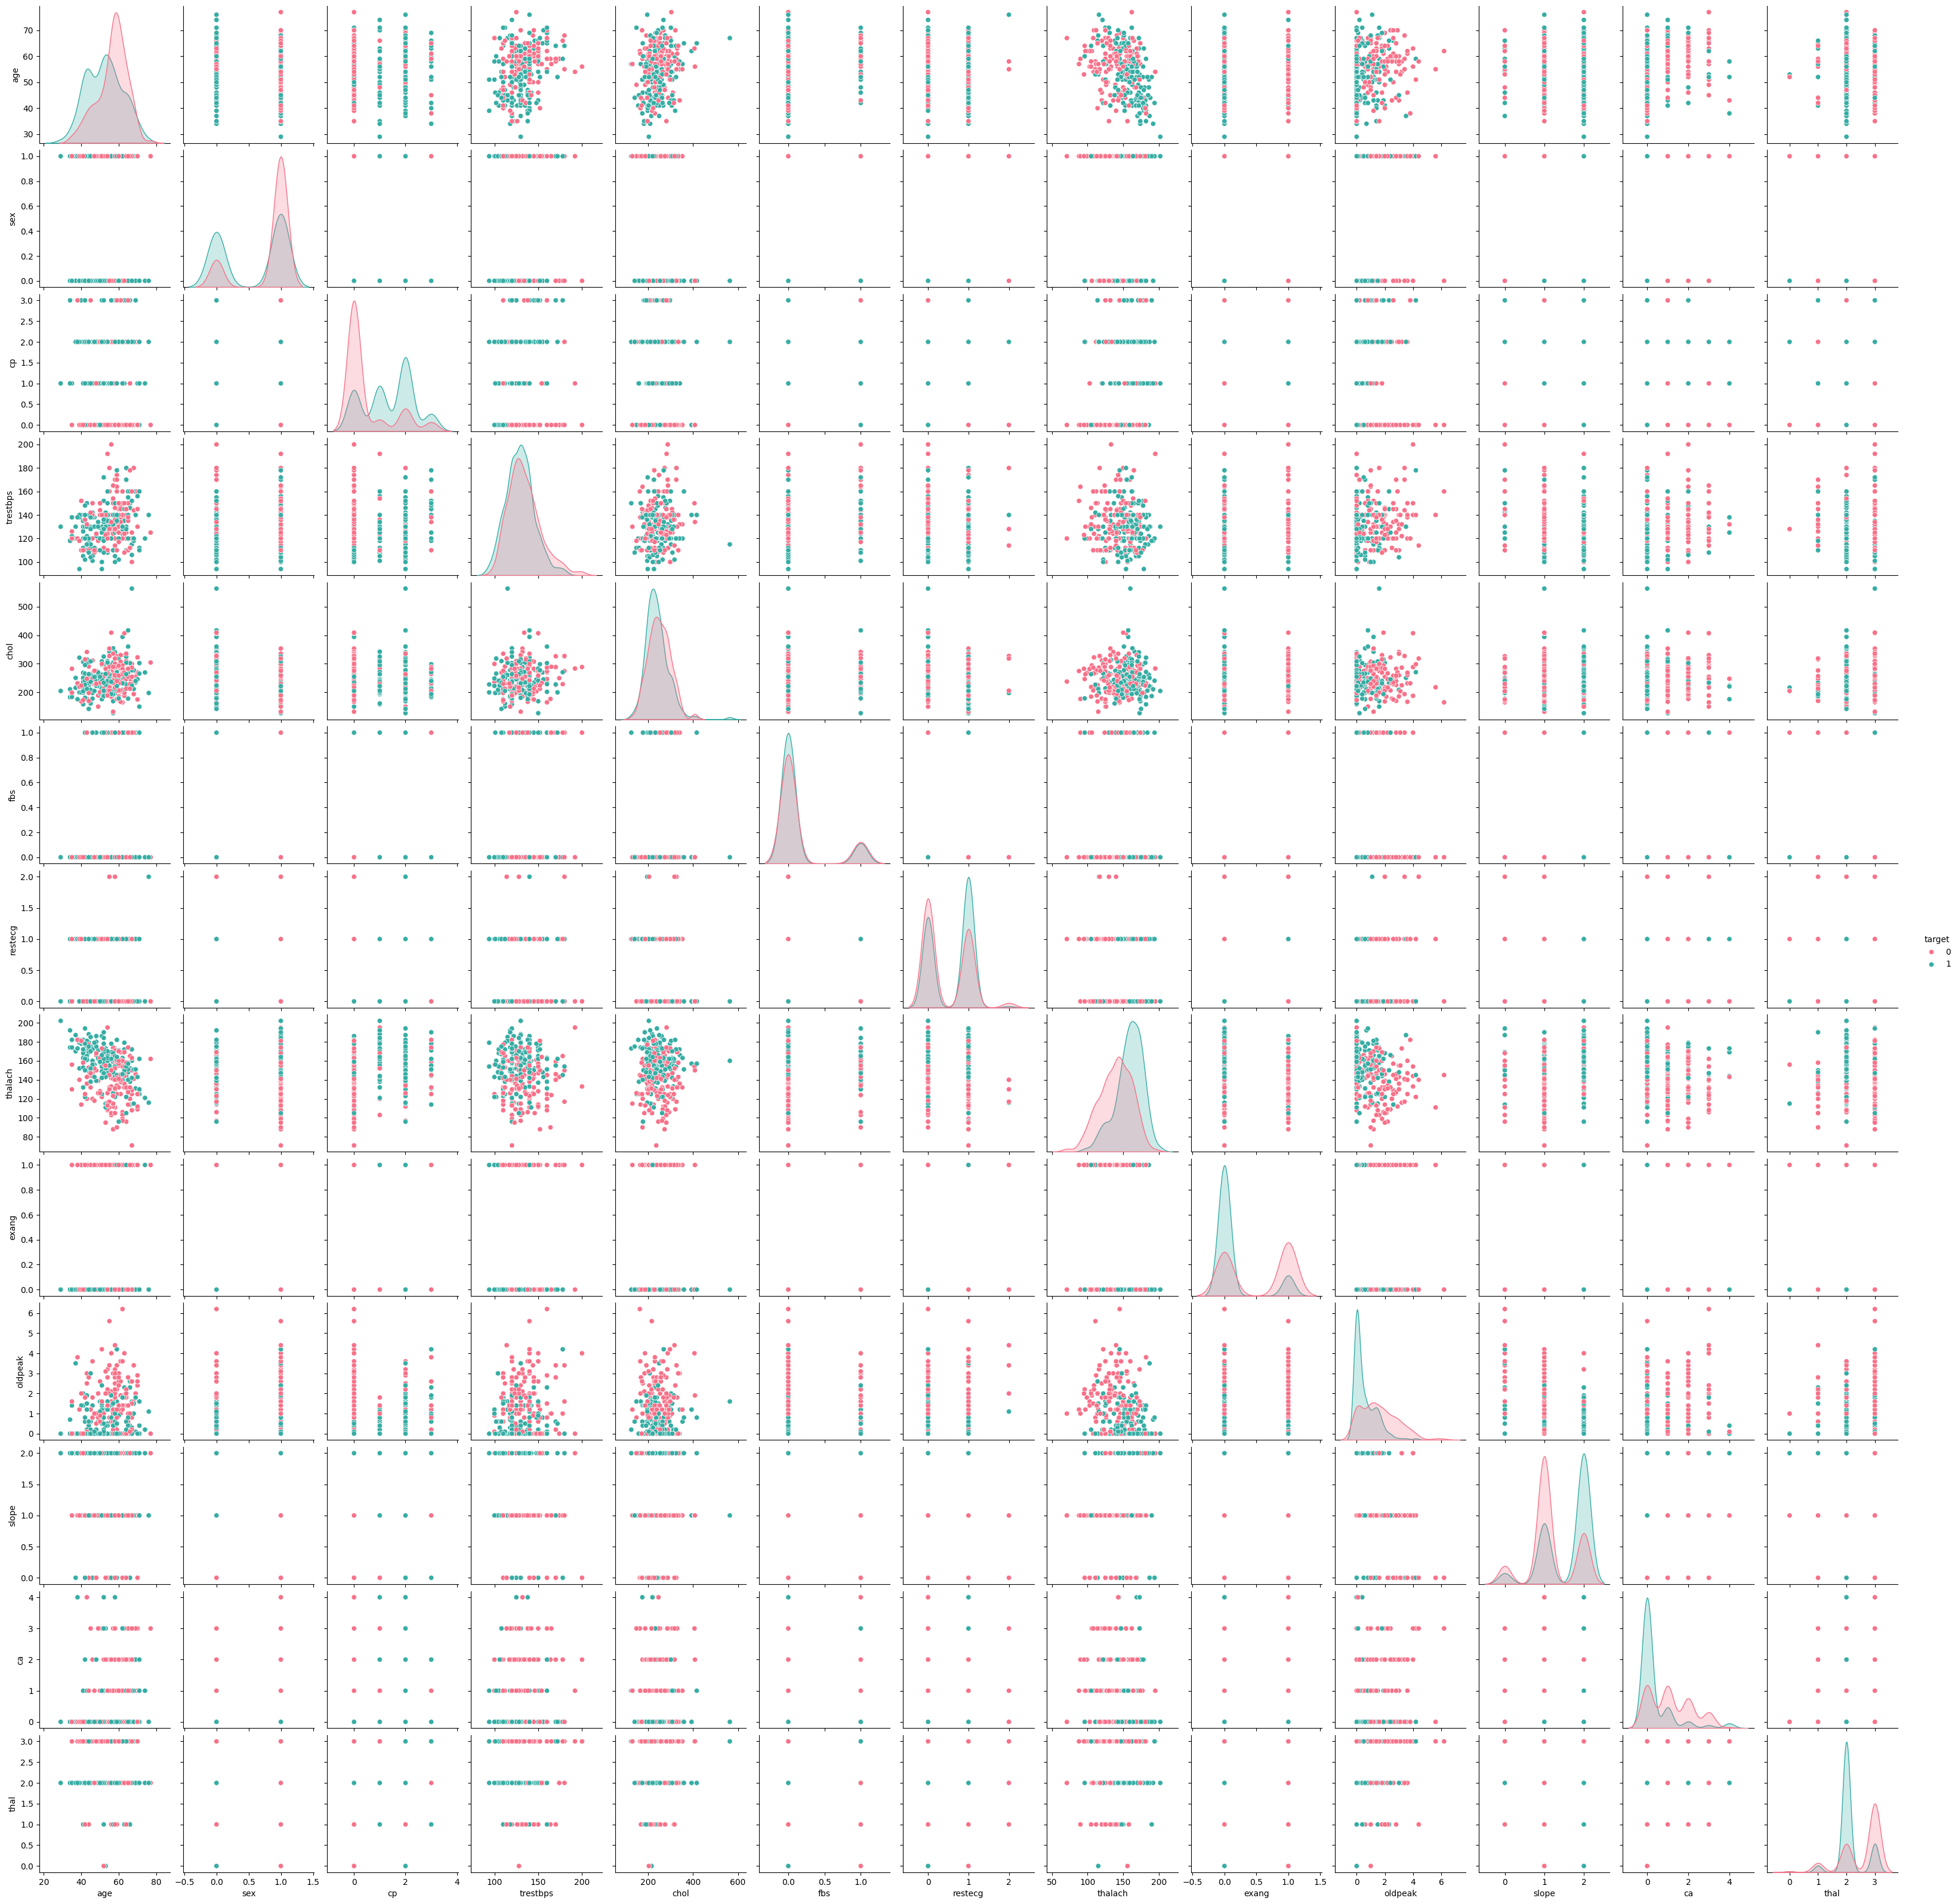

In [42]:

sns.pairplot(dataset, hue='target', palette='husl')
plt.show()


<h1>ANALYZING SEX AND TARGET VARIABLE</h1>

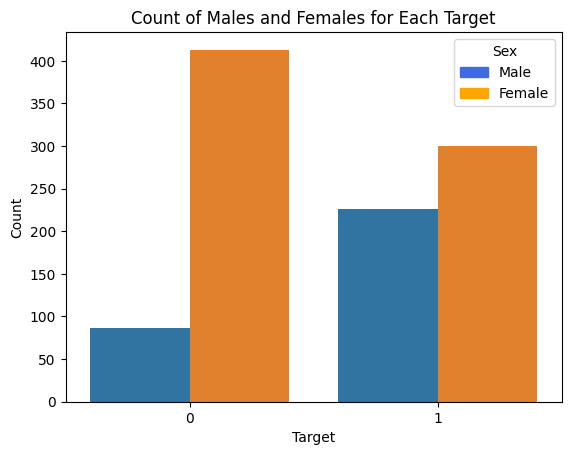

In [29]:

import matplotlib.patches as mpatches

grouped_data = dataset.groupby(['sex', 'target']).size().reset_index(name='count')

custom_palette = {"Male": "royalblue", "Female": "orange"}
sns.barplot(data=grouped_data, x='target', y='count', hue='sex')
plt.xlabel('Target')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.ylabel('Count')
plt.title('Count of Males and Females for Each Target')
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in custom_palette.items()]
plt.legend(handles=legend_patches, title='Sex')

plt.show()


<h4>The above visualizations indicate that by record females are more prone to heart disease than male</h4>

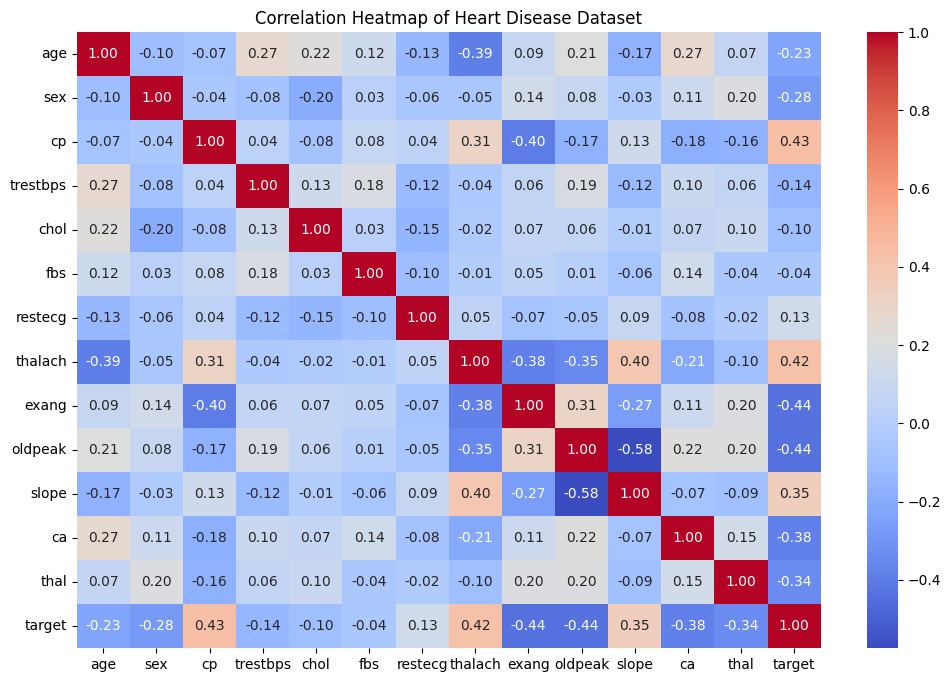

In [40]:

correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


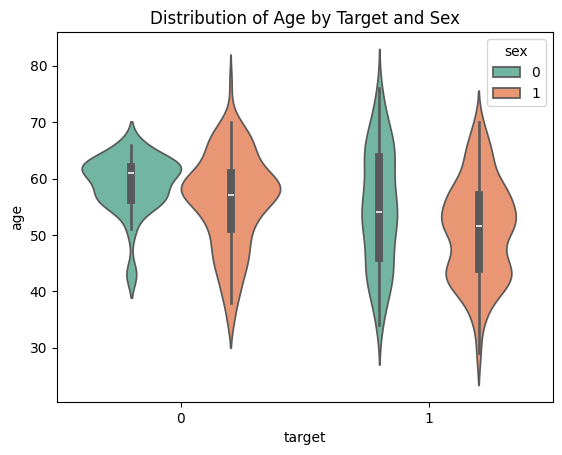

In [41]:
sns.violinplot(x='target', y='age', data=dataset, hue='sex', palette='Set2')
plt.title('Distribution of Age by Target and Sex')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [32]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 16.0484 - accuracy: 0.4012
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 7.7562 - accuracy: 0.3317
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 5.9450 - accuracy: 0.3244
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 4.7087 - accuracy: 0.3354
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 3.8758 - accuracy: 0.3671
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 3.1086 - accuracy: 0.3720
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 2.5314 - accuracy: 0.4232
Epoch 8/100
26/26 [==============================] - 0s 5ms/step - loss: 2.0980 - accuracy: 0.4683
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 1.7754 - accuracy: 0.4951
Epoch 10/100
26/26 [==============================] - 0s 4ms/step - loss: 1.4909 - accuracy: 0.5171
Epoch 11

In [33]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

7/7 [==============================] - 0s 6ms/step
The accuracy score achieved using Neural Network is: 82.93 %


In [34]:

input_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]


prediction = lr.predict(input_data)
if prediction[0] == 0:
    result = "No heart disease"
else:
    result = "Heart disease detected"

print("Prediction:", result)


Prediction: Heart disease detected
